In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import skimage.transform

In [2]:
def get_filelist(img_loc):
    filelist = glob.glob(img_loc+'*.jpg')
    filelist.sort()
    return filelist

In [3]:
def get_labels(labels_loc, m=10015):
    Y_df = pd.read_csv(labels_loc)
    Y_orig = np.array(Y_df.iloc[:m, 1:])
    labels = Y_df.iloc[:,1:].idxmax(axis = 1)
    labels.replace('MEL','Melanoma',inplace=True)
    labels.replace('NV','Melanocytic nevus',inplace=True)
    labels.replace('BCC','Basal cell carcinoma',inplace=True)
    labels.replace('AKIEC','Actinic keratosis',inplace=True)
    labels.replace('BKL','Benign keratosis',inplace=True)
    labels.replace('DF','Dermatofibroma',inplace=True)
    labels.replace('VASC','Vascular lesion',inplace=True)
    return Y_orig, labels
    

In [4]:
labels_loc = '../ISIC2018_Task3_Training_GroundTruth/ISIC2018_Task3_Training_GroundTruth.csv'
Y_orig, labels = get_labels(labels_loc)
Y_df = pd.read_csv(labels_loc)

In [5]:
img_loc = '../ISIC2018_Task3_Training_Input/'

filelist = get_filelist(img_loc)

In [6]:
# Load images as arrays

def get_X_orig(filelist, input_shape):
    
    bs, n_H, n_W, n_C = input_shape
    X_orig = np.empty([bs, n_H, n_W, n_C])

    for i, fname in enumerate(filelist[:bs]):
        img = plt.imread(fname)
        img = skimage.transform.resize(img, (n_H,n_W), mode='constant')
        X_orig[i] = img
        if i%100 == 99 or i == bs-1:
            print('{} files loaded'.format(i+1))
    
    return X_orig

In [7]:
bs = 200
input_shape = [bs, 224, 224, 3]

X_orig = get_X_orig(filelist, input_shape)

100 files loaded
200 files loaded


In [9]:
def get_random_crops(filelist, input_shape, Y_orig, num_crops, label):
    
    #rc = random crom
    
    label_dict = {'MEL':0, 'NV':1, 'BCC': 2, 'AKIEC': 3, 'BKL': 4, 'DF': 5, 'VASC': 6}
    label_num = label_dict[label]
    Y_lst = []
    bs, n_H, n_W, n_C = input_shape
    bs_rc = (np.sum((Y_orig[:,label_num]==1).astype(int)))*num_crops
    X_rc = np.empty([bs_rc, n_H, n_W, n_C])
    dfrcloc = 0
    for i, fname in enumerate(filelist[:bs]):
        if Y_orig[i,label_num]:
            img = plt.imread(fname)
            for j in range(num_crops):
                c = np.random.choice(range(-20,20),4)
                img_cropped = img[50+c[0]:400+c[1],50+c[2]:550+c[3],:]
                img_cropped = skimage.transform.resize(img, (n_H,n_W), mode='constant')
                X_rc[dfrcloc] = img_cropped
                Y_lst.append(Y_orig[i])
                dfrcloc +=1
    Y_rc = np.array(Y_lst)
    return X_rc, Y_rc

In [10]:
num_crops = 4

X_DF_rc, Y_DF_rc = get_random_crops(filelist, input_shape, Y_orig, num_crops, label='DF')

In [11]:
Y_DF_rc

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.]])

In [42]:
def plot_imgs(X, label, num_images, filename):
    num_cols = 2
    num_rows = num_images//num_cols

    fig, ax = plt.subplots(nrows = num_rows, ncols = num_cols, squeeze=False)
    fig.set_size_inches(8,8)
    #fig.axis('off')
    for i in range(num_images):
        # Find the right place to put the images, a is the row in the figure and b is the column

        a = i//num_cols
        b = i%num_cols
        print(a,b)
        # Draw image and set x label as the actual label of the image i.e. the value of the digit in the image
        ax[a][b].axis('off')
        ax[a][b].imshow(X[i])
        ax[a][b].set_title(label, fontsize = 20)


    fig.savefig(filename)
    fig.show()

0 0
0 1
1 0
1 1


C:\Users\Dwarkanath\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


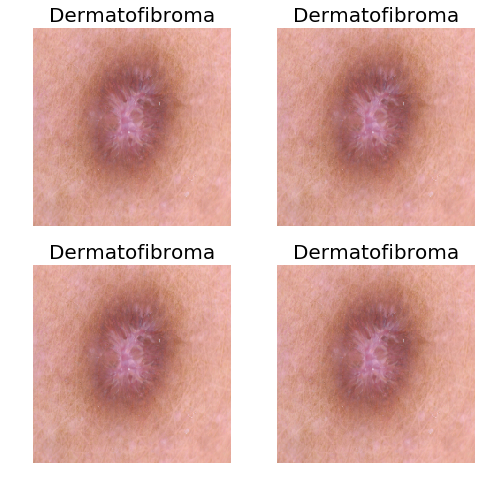

In [43]:
num_images = 4
filename = 'Task3-Imgs-DF-Crops.png'
label = 'Dermatofibroma'
X = X_DF_rc
plot_imgs(X, label, num_images, filename)

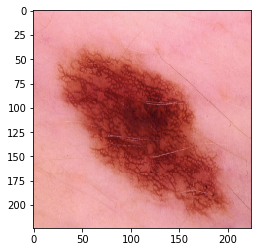

In [44]:
plt.imshow(X_orig[2])

In [45]:
m, n_H0, n_W0, n_C0 = X_orig.shape
X_flip = X_orig[:,:,n_W0-1::-1,:]

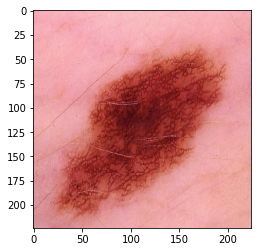

In [46]:
plt.imshow(X_flip[2])

0 0
0 1


C:\Users\Dwarkanath\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


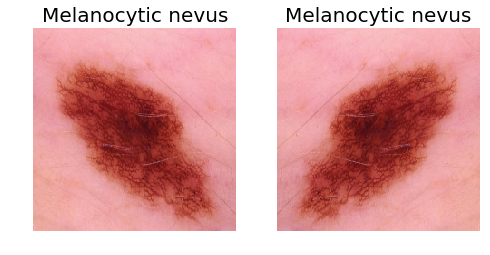

In [47]:
num_images = 2
filename = 'Task3-Imgs-Mirror.png'
label = labels[2]
X = np.array([X_orig[2], X_flip[2]])
plot_imgs(X, label, num_images, filename)